In [116]:
import numpy as np
import pandas as pd
import random as random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [117]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [118]:
# # load data
data=pd.read_csv('data_clean.csv', index_col=0, parse_dates=[0])
print(data.shape)
# data = data.set_index('date')
data = data.drop(['population_density', 'diabetes_prevalence', 'female_smokers', 'life_expectancy',
       'human_development_index', 'aged_70_older', 'population'], axis=1)
data.head()
# train = pd.read_csv('train.csv', index_col=0, parse_dates=[0])
# test = pd.read_csv('test.csv', index_col=0, parse_dates=[0])
# train = train.drop(['population_density', 'diabetes_prevalence', 'female_smokers', 'life_expectancy',
#        'human_development_index', 'aged_70_older', 'population'], axis=1)
# test = test.drop(['population_density', 'diabetes_prevalence', 'female_smokers', 'life_expectancy',
#        'human_development_index', 'aged_70_older', 'population'], axis=1)
# train.head()

(10300, 31)


/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_36372/558405970.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.read_csv('data_clean.csv', index_col=0, parse_dates=[0])
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_36372/558405970.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.read_csv('data_clean.csv', index_col=0, parse_dates=[0])


,date,location,new_cases,new_deaths,reproduction_rate,new_tests,stringency_index,holidays,season,day_of_week,...,dayofyear,dayofmonth,weekofyear,new_cases_lag1,new_cases_lag7,new_cases_lag8,new_cases_roll_mean7,new_cases_roll_std7,new_cases_roll_mean14,new_cases_roll_std14
0,2020-03-21,Belgium,713.0,35.0,2.16,2276.0,81.48,0,Spring,5,...,81,21,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-22,Belgium,662.0,40.0,2.13,1414.0,81.48,0,Spring,6,...,82,22,12,713.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-23,Belgium,469.0,41.0,2.09,3322.0,81.48,0,Spring,0,...,83,23,13,662.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-24,Belgium,486.0,55.0,2.05,3975.0,81.48,0,Spring,1,...,84,24,13,469.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-25,Belgium,1328.0,81.0,2.01,4282.0,81.48,0,Spring,2,...,85,25,13,486.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# for date column, convert from string to datetime then to ordinal
data['date']=pd.to_datetime(data['date'])
data['date']=data['date'].apply(lambda x: x.toordinal())

# for season column, convert from string to int
season_dict={'Spring':1.0, 'Summer':2.0, 'Autumn':3.0, 'Winter':4.0}
data['season']=data['season'].map(season_dict)
data.head()

# # for date column, convert from string to datetime then to ordinal
# train['date']=pd.to_datetime(train['date'])
# train['date']=train['date'].apply(lambda x: x.toordinal())

# # for season column, convert from string to int
# season_dict={'Spring':1.0, 'Summer':2.0, 'Autumn':3.0, 'Winter':4.0}
# train['season']=train['season'].map(season_dict)

# # for date column, convert from string to datetime then to ordinal
# test['date']=pd.to_datetime(train['date'])
# test['date']=test['date'].apply(lambda x: x.toordinal())

# # for season column, convert from string to int
# season_dict={'Spring':1.0, 'Summer':2.0, 'Autumn':3.0, 'Winter':4.0}
# test['season']=test['season'].map(season_dict)

,date,location,new_cases,new_deaths,reproduction_rate,new_tests,stringency_index,holidays,season,day_of_week,...,dayofyear,dayofmonth,weekofyear,new_cases_lag1,new_cases_lag7,new_cases_lag8,new_cases_roll_mean7,new_cases_roll_std7,new_cases_roll_mean14,new_cases_roll_std14
0,737505,Belgium,713.0,35.0,2.16,2276.0,81.48,0,1.0,5,...,81,21,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,737506,Belgium,662.0,40.0,2.13,1414.0,81.48,0,1.0,6,...,82,22,12,713.0,0.0,0.0,0.0,0.0,0.0,0.0
2,737507,Belgium,469.0,41.0,2.09,3322.0,81.48,0,1.0,0,...,83,23,13,662.0,0.0,0.0,0.0,0.0,0.0,0.0
3,737508,Belgium,486.0,55.0,2.05,3975.0,81.48,0,1.0,1,...,84,24,13,469.0,0.0,0.0,0.0,0.0,0.0,0.0
4,737509,Belgium,1328.0,81.0,2.01,4282.0,81.48,0,1.0,2,...,85,25,13,486.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
from sklearn.preprocessing import RobustScaler

scalers = {}
#cols_to_scale = data.columns.difference(['location', 'date', 'holidays', 'season', 'day_of_week',
#       'weekend', 'month', 'year', 'quarter', 'dayofyear', 'dayofmonth','weekofyear'])
cols_to_scale = data.columns.difference(['location'])

for location, country_data in data.groupby('location'):
    scaler = RobustScaler()
    data.loc[data['location'] == location, cols_to_scale] = scaler.fit_transform(country_data[cols_to_scale])
    scalers[location] = scaler

# data.head()
# from sklearn.preprocessing import RobustScaler

# scalers = {}
# #cols_to_scale = data.columns.difference(['location', 'date', 'holidays', 'season', 'day_of_week',
# #       'weekend', 'month', 'year', 'quarter', 'dayofyear', 'dayofmonth','weekofyear'])
# cols_to_scale = train.columns.difference(['location'])

# for location, country_data in train.groupby('location'):
#     scaler = RobustScaler()
#     train.loc[train['location'] == location, cols_to_scale] = scaler.fit_transform(country_data[cols_to_scale])
#     # apply to test
#     test_country_data = test[test['location'] == location]
#     train.loc[train['location'] == location, cols_to_scale] = scaler.fit_transform(country_data[cols_to_scale])
#     scalers[location] = scaler

# train.head()


/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_36372/2592172670.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.         -0.99805637 -0.99611273 ...  0.99611273  0.99805637
  1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['location'] == location, cols_to_scale] = scaler.fit_transform(country_data[cols_to_scale])
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_36372/2592172670.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.5   0.75 -0.75 ...  0.    0.25  0.5 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['location'] == location, cols_to_scale] = scaler.fit_transform(country_data[cols_to_scale])
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_36372/2592172670.py:10: Fu

In [121]:
# data = pd.concat([train, test])
# data = data.sort_values(by=['location','date'])
# data.reset_index(drop=True, inplace=True)
# data.head()

In [122]:
# use Italy for now
data_italy = data[data['location']=='Italy']
data_italy.drop('location', axis=1, inplace=True)
# make index from 0 to length of data
data_italy.reset_index(drop=True, inplace=True)

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_36372/134857427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_italy.drop('location', axis=1, inplace=True)


In [123]:
# manupulate data for LSTM
def make_series(data):
    series = []
    for i in range(len(data)-14):
        sub_seq = data[i:i+14]
        series.append((sub_seq.index[-1], sub_seq['new_cases'].values[-1], sub_seq.drop('new_cases', axis=1).values))
    return series

series_italy = make_series(data_italy)
print(series_italy[0][0],series_italy[0][1].shape,series_italy[0][2].shape)

13 () (14, 22)


In [124]:
train_italy = series_italy[:-14]
test_italy = series_italy[-14:]

## Grid Search with early stopping

In [125]:
# set up grid search for hyperparameters, including learning rate, batch size, and LSTM units
learning_rates = [0.01, 0.001]
batch_sizes = [32, 64]
n_epochs = 500
sequence_length = 14
n_units = [32, 64]
early_stopping_patience = [10, 20]

def build_model(x, y, learning_rate=0.001, batch_size=32, n_epochs=500, sequence_length=14, n_units=32, early_stopping_patience=10):
    inputs = keras.layers.Input(shape=(sequence_length,22))
    lstm_out = keras.layers.LSTM(n_units)(inputs)
    outputs = keras.layers.Dense(1)(lstm_out)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=learning_rate), loss="mae")
    history = model.fit(x, y, batch_size=batch_size, epochs=n_epochs, shuffle=True, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=early_stopping_patience, verbose=1)])
    return history, model

x=np.array([x[2].reshape(14,22) for x in train_italy])
y=np.array([x[1] for x in train_italy])
print(x.shape)
print(y.shape)

# grid search
histories = []
models = []
for lr in learning_rates:
    for bs in batch_sizes:
        for n_unit in n_units:
            for patience in early_stopping_patience:
                print('learning rate: {}, batch size: {}, LSTM units: {}, early stopping patience: {}'.format(lr, bs, n_unit, patience))
                history, model = build_model(x, y, learning_rate=lr, batch_size=bs, n_epochs=n_epochs, sequence_length=sequence_length, n_units=n_unit, early_stopping_patience=patience)
                histories.append(history)
                models.append(model)

(1002, 14, 22)
(1002,)
learning rate: 0.01, batch size: 32, LSTM units: 32, early stopping patience: 10
Epoch 1/500
26/26 [==============================] - 2s 19ms/step - loss: 0.3101 - val_loss: 0.4224
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 0.2197 - val_loss: 0.3284
Epoch 3/500
26/26 [==============================] - 0s 2ms/step - loss: 0.1831 - val_loss: 0.3547
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 0.1554 - val_loss: 0.2970
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.1310 - val_loss: 0.2554
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.1223 - val_loss: 0.2234
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.1086 - val_loss: 0.2616
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.1232 - val_loss: 0.2098
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.1032 - val_loss: 0.2536
Epoc

In [126]:
# find the best model
min_val_loss = 1000000
best_model = None
for model in models:
    if min(model.history.history['val_loss']) < min_val_loss:
        min_val_loss = min(model.history.history['val_loss'])
        best_model = model

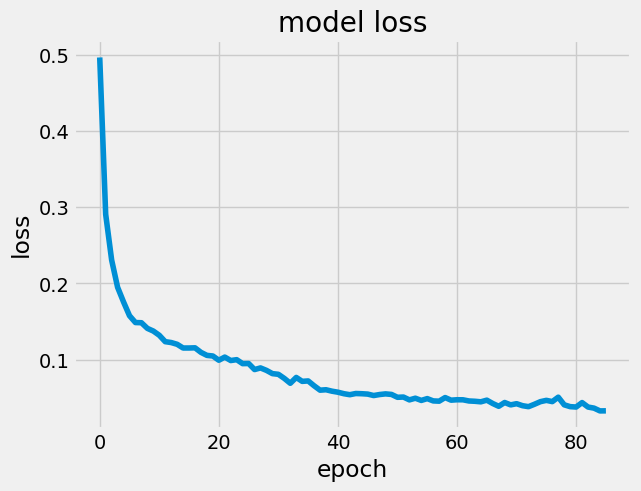

In [127]:
# print loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [128]:
train_pred=pd.DataFrame(best_model.predict(x), columns=['yhat'], index=[x[0] for x in train_italy ])
train_pred.head()

32/32 [==============================] - 0s 1ms/step


,yhat
13,-0.321104
14,-0.318638
15,-0.334399
16,-0.365169
17,-0.375443


1/1 [==============================] - 0s 52ms/step


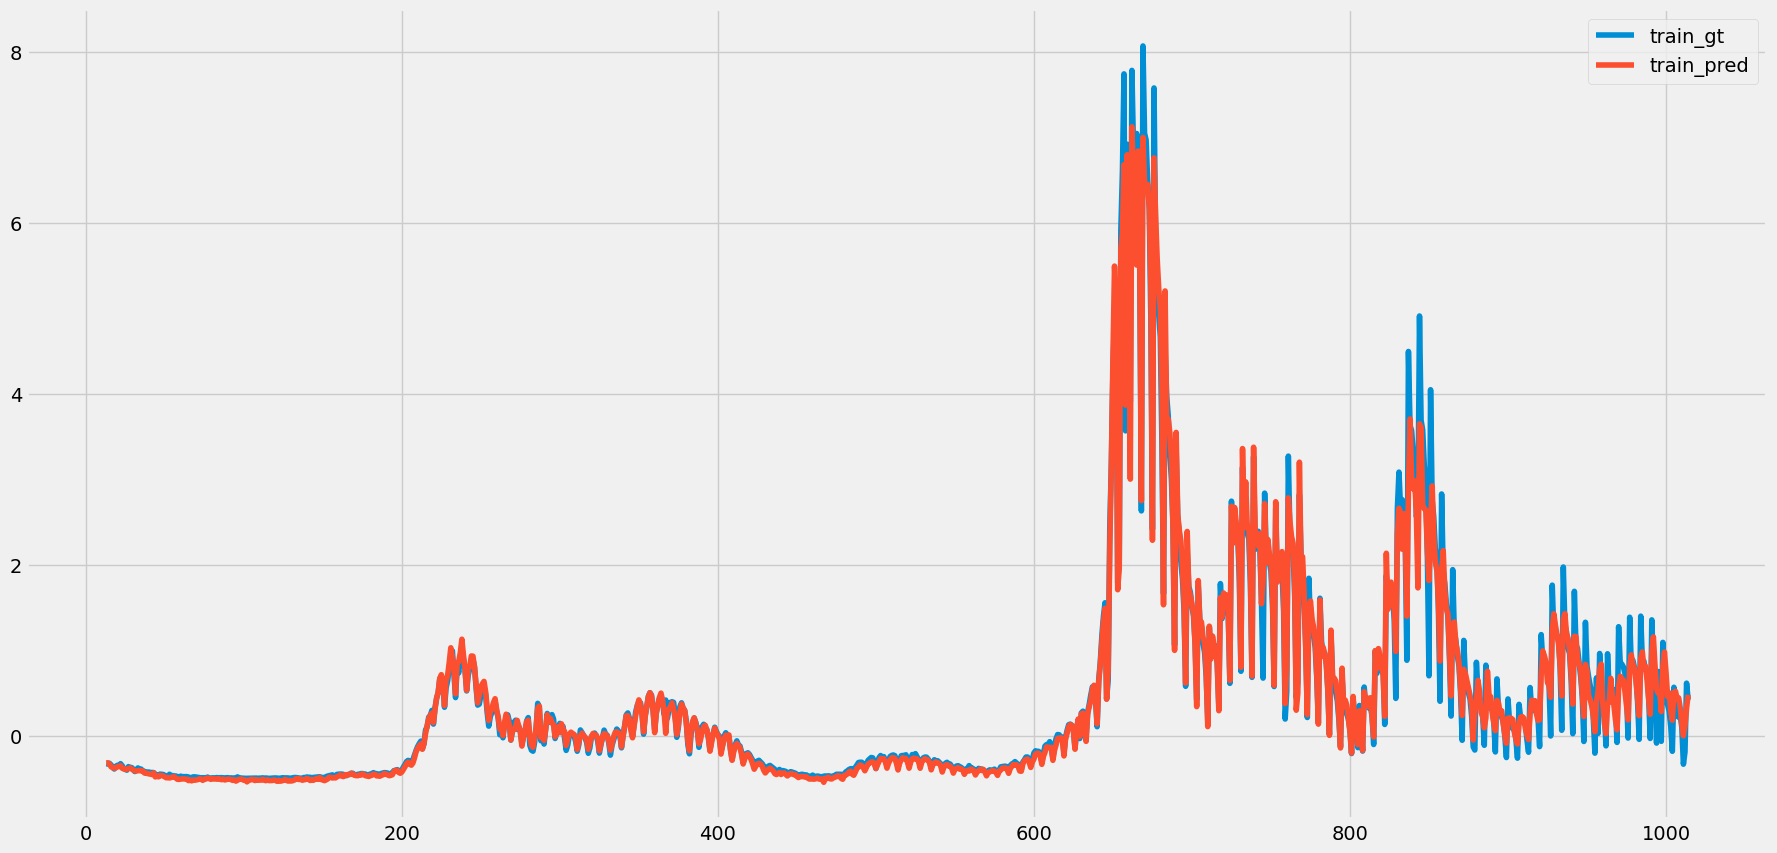

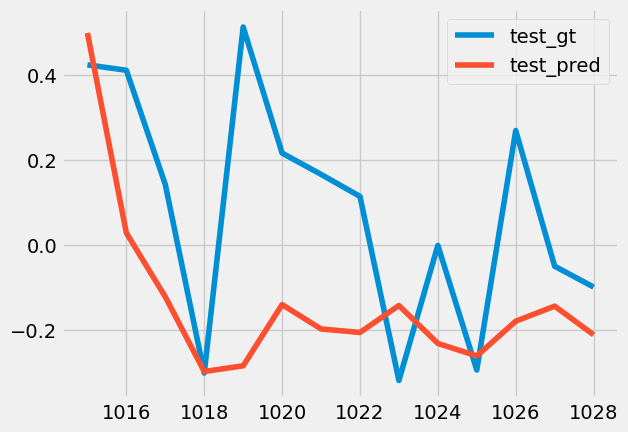

In [129]:
train_gt= pd.DataFrame(y, columns=['y'], index=[x[0] for x in train_italy ])
pd.concat([train_gt, train_pred], axis=1).plot(figsize=(20,10))
plt.legend(['train_gt', 'train_pred'])

test_gt=pd.DataFrame([x[1] for x in test_italy], columns=['y'], index=[x[0] for x in test_italy ])
test_pred=best_model.predict(np.array([x[2].reshape(14,22) for x in test_italy]))
test_pred=pd.DataFrame(test_pred, columns=['yhat'], index=[x[0] for x in test_italy ])
pd.concat([test_gt, test_pred], axis=1).plot()
plt.legend(['test_gt', 'test_pred'])

In [130]:
# italy_scaler = scalers['Italy']
# train_gt= pd.DataFrame(y, columns=['y'], index=[x[0] for x in train_italy ])
# train_gt_inversed = italy_scaler.inverse_transform(train_gt['y'].values.reshape(-1,1))
# train_pred_inversed = italy_scaler.inverse_transform(train_pred['yhat'].values.reshape(-1,1))
# pd.concat([train_gt_inversed, train_pred_inversed], axis=1).plot(figsize=(20,10))
# plt.legend(['train_gt_inversed', 'train_pred_inversed'])

# test_gt=pd.DataFrame([x[1] for x in test_italy], columns=['y'], index=[x[0] for x in test ])
# test_gt_inversed = italy_scaler.inverse_transform(test_gt['y'].values.reshape(-1,1))
# test_pred=best_model.predict(np.array([x[2].reshape(14,22) for x in test_italy]))
# test_pred=pd.DataFrame(test_pred, columns=['yhat'], index=[x[0] for x in test_italy ])
# test_pred_inversed = italy_scaler.inverse_transform(test_pred['yhat'].values.reshape(-1,1))
# pd.concat([test_gt_inversed, test_pred_inversed], axis=1).plot()
# plt.legend(['test_gt', 'test_pred'])

In [131]:
# check best model parameters
best_model.summary()
# check best model learning rate
best_model.optimizer.get_config()['learning_rate']

Model: "model_186"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_187 (InputLayer)      [(None, 14, 22)]          0         
                                                                 
 lstm_186 (LSTM)             (None, 64)                22272     
                                                                 
 dense_186 (Dense)           (None, 1)                 65        
                                                                 
Total params: 22337 (87.25 KB)
Trainable params: 22337 (87.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


0.01

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_36372/2665011155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data[country].drop('location', axis=1, inplace=True)
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_36372/2665011155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data[country].drop('location', axis=1, inplace=True)
/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_36372/2665011155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Epoch 1/500
25/25 [==============================] - 5s 44ms/step - loss: 0.6799 - val_loss: 0.2695
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4250 - val_loss: 0.1808
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3641 - val_loss: 0.1652
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2975 - val_loss: 0.1396
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2979 - val_loss: 0.1221
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2532 - val_loss: 0.1308
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2421 - val_loss: 0.1516
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2318 - val_loss: 0.1334
Epoch 9/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2262 - val_loss: 0.1365
Epoch 10/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2286 - val_loss: 0.1702
Epoch 11

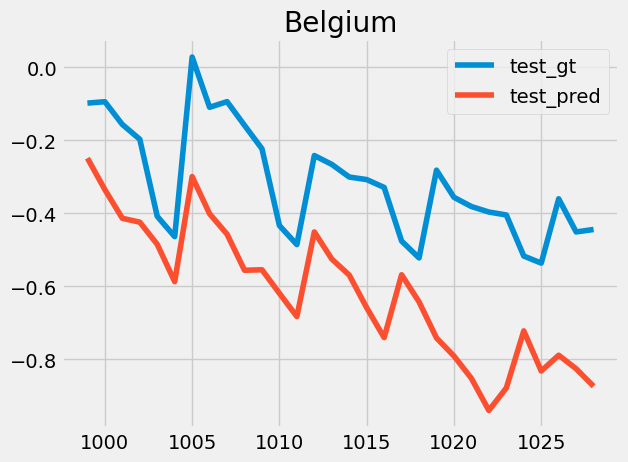

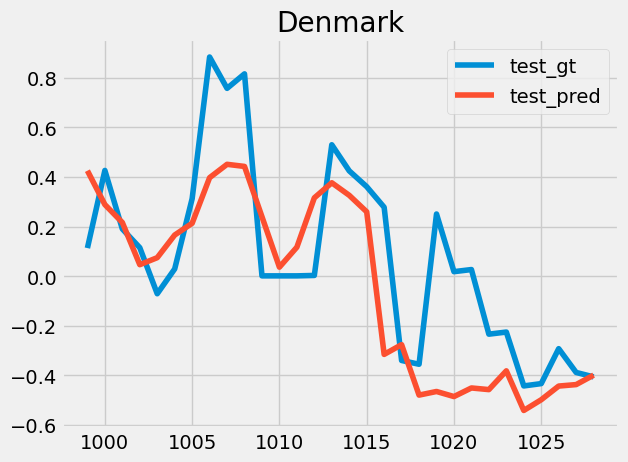

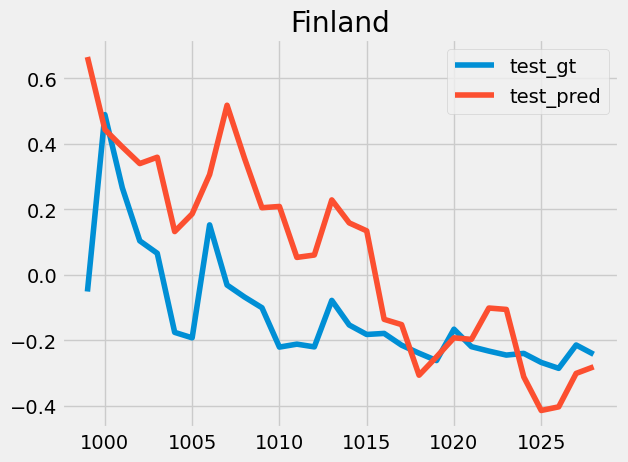

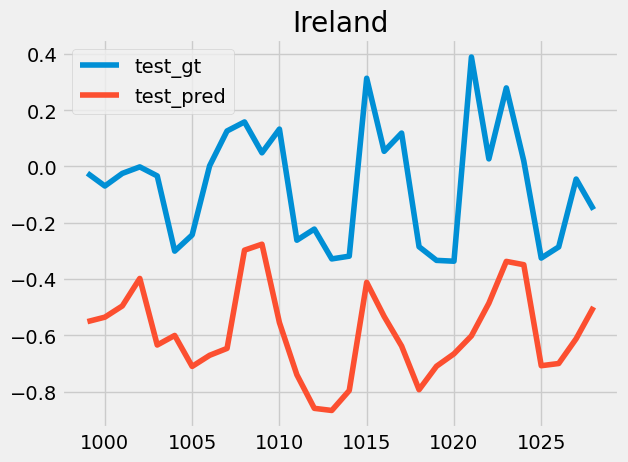

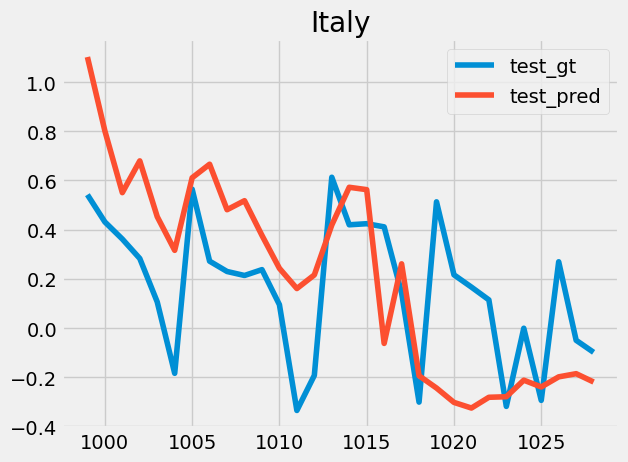

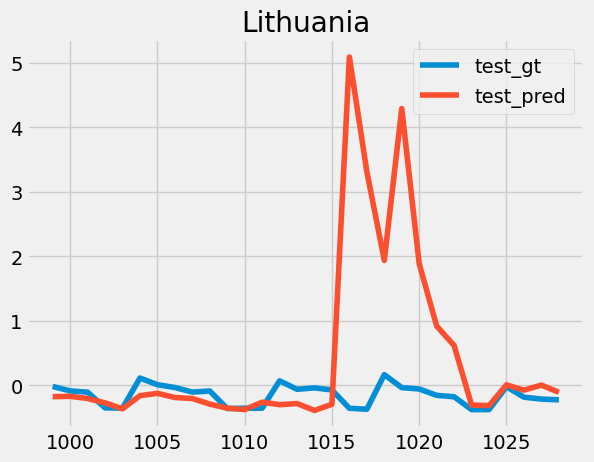

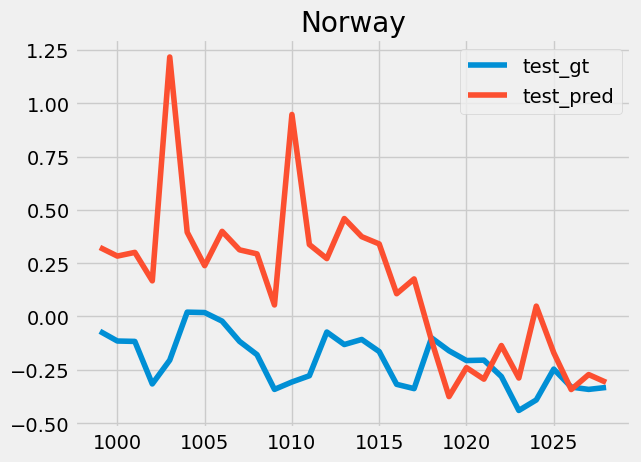

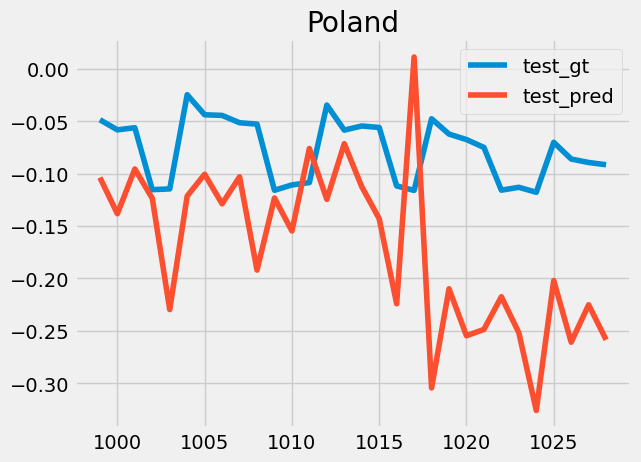

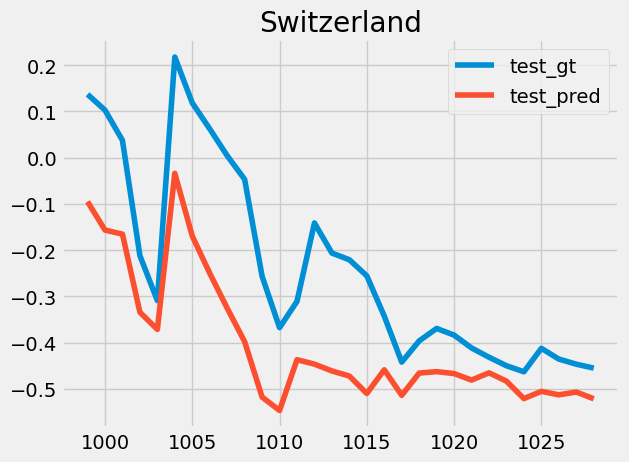

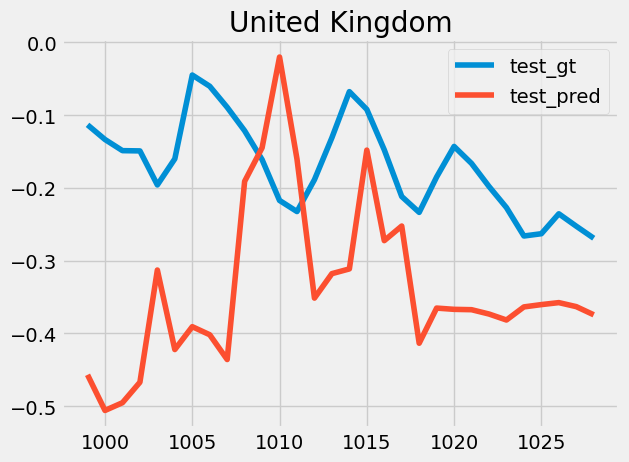

In [132]:
# make a dictionary of dataframes for each country
country_list = data['location'].unique()

country_data = {}
for country in country_list:
    country_data[country] = data[data['location']==country]
    country_data[country].drop('location', axis=1, inplace=True)
    country_data[country].reset_index(drop=True, inplace=True)

# make series for each country
country_series = {}
for country in country_list:
    country_series[country] = make_series(country_data[country])
    
# train test split for each country
country_train = {}
country_test = {}
for country in country_list:
    country_train[country] = country_series[country][:-30]
    country_test[country] = country_series[country][-30:]

# train model for each country
country_model = {}
for country in country_list:
    x=np.array([x[2].reshape(14,22) for x in country_train[country]])
    y=np.array([x[1] for x in country_train[country]])
    history, model = build_model(x, y, learning_rate=0.01, batch_size=32, n_epochs=500, sequence_length=14, n_units=32, early_stopping_patience=10)
    country_model[country] = model

# make prediction for each country
country_pred = {}
for country in country_list:
    x=np.array([x[2].reshape(14,22) for x in country_test[country]])
    country_pred[country] = country_model[country].predict(x)

# plot prediction for each country
for country in country_list:
    test_pred=pd.DataFrame(country_pred[country], columns=['yhat'], index=[x[0] for x in country_test[country] ])
    test_gt=pd.DataFrame([x[1] for x in country_test[country]], columns=['y'], index=[x[0] for x in country_test[country] ])
    pd.concat([test_gt, test_pred], axis=1).plot()
    plt.legend(['test_gt', 'test_pred'])
    plt.title(country)